# Werewolf Among Us: Humans vs LLM Comparison

EDA and comparison of the datasets

In [31]:
import ast
import os
import json
import random 

import pandas as pd
import numpy as np

# Viz
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# pio.renderers.default = "notebook+plotly_mimetype+png"
# For some reason, the correct setting to get the plots to show up in Quarto HTML?
pio.renderers.default = "plotly_mimetype+notebook_connected+png"

## Load data

In [44]:
hum_datapath = os.path.normpath("../Data/Output/EDA_WAU")
llm_datapath = os.path.normpath("../Data/Output/EDA_WA")

hum_rounds_df = pd.read_csv(os.path.join(hum_datapath, "allrounds.csv"), index_col=0)
hum_text_df = pd.read_csv(os.path.join(hum_datapath, "alltext.csv"), index_col=0)
hum_text_df["strategy"] = hum_text_df["strategy"].apply(ast.literal_eval)

llm_rounds_df = pd.read_csv(os.path.join(llm_datapath, "allrounds.csv"), index_col=0)
llm_rounds_df["players"] = llm_rounds_df["players"].apply(ast.literal_eval)
llm_rounds_df["roles"] = llm_rounds_df["roles"].apply(ast.literal_eval)

llm_text_df = pd.read_csv(os.path.join(llm_datapath, "alltext.csv"), index_col=0)
llm_text_df["players"] = llm_text_df["players"].apply(ast.literal_eval)
llm_text_df["roles"] = llm_text_df["roles"].apply(ast.literal_eval)
# llm_text_df["votes"] = llm_text_df["votes"].apply(ast.literal_eval, )
llm_text_df["strategy"] = llm_text_df["strategy"].apply(ast.literal_eval)

In [45]:
hum_rounds_df

,game_id,speaker,source,voted_for,role,votes_target,winner
0,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,jessica,Seer,jessica,Villagers
1,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kaelan,Ego4D,jessica,Center card,jessica,Villagers
2,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,jessica,Ego4D,NaN,Werewolf,jessica,Villagers
3,game7 - 62c4bc58-3776-4791-ac30-4c9ca5619503,daniel,Ego4D,daniel,Werewolf,jessica,Villagers
4,game9 - 62c4bc58-3776-4791-ac30-4c9ca5619503,kevin,Ego4D,NaN,Troublemaker,NaN,Werewolves
...,...,...,...,...,...,...,...
739,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,justin,Youtube,eric,Werewolf,eric,Werewolves
740,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,eric,Youtube,mitchell,Tanner,eric,Werewolves
741,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,paul,Youtube,mitchell,Villager,eric,Werewolves
742,game5 - Retrovision ONE NIGHT ULTIMATE WEREWO...,mitchell,Youtube,eric,Troublemaker,eric,Werewolves


In [46]:
llm_rounds_df

,players,eliminated,unmasked,protected,exiled,success,game_id,winner,round,roles
0,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew..."
1,"[Harold, Sam, Jackson, Hayley, Jacob, Mason]",Will,NaN,Sam,NaN,True,861,Werewolves,1,"[Villager, Villager, Villager, Werewolf, Werew..."
2,"[Sam, Hayley, Jacob, Mason]",Harold,NaN,Sam,Jackson,True,861,Werewolves,2,"[Villager, Werewolf, Werewolf, Doctor]"
3,"[Tyler, Ginger, Jackson, Leah, Hayley, Sam, Is...",Dan,Dan,Ginger,NaN,True,577,Werewolves,0,"[Villager, Villager, Villager, Werewolf, Werew..."
4,"[Tyler, Ginger, Jackson, Leah, Hayley, Sam]",Isaac,Tyler,Tyler,NaN,True,577,Werewolves,1,"[Villager, Villager, Villager, Werewolf, Werew..."
5,"[Tyler, Ginger, Leah, Hayley, Sam]",Jackson,NaN,Tyler,NaN,True,577,Werewolves,2,"[Villager, Villager, Werewolf, Werewolf, Doctor]"
6,"[Tyler, Ginger, Leah, Hayley]",Sam,NaN,Leah,NaN,True,577,Werewolves,3,"[Villager, Villager, Werewolf, Werewolf]"
7,"[David, Bert, Jacob, Harold, Hayley, Mason, Will]",Scott,Jacob,David,NaN,True,704,Villagers,0,"[Villager, Villager, Villager, Werewolf, Werew..."
8,"[David, Bert, Jacob, Harold, Mason, Will]",Will,Hayley,Will,Hayley,True,704,Villagers,1,"[Villager, Villager, Villager, Werewolf, Docto..."
9,"[David, Bert, Jacob, Will]",Mason,David,David,Harold,True,704,Villagers,2,"[Villager, Villager, Villager, Seer]"


In [47]:
hum_text_df

,Rec_Id,speaker,timestamp,text,strategy,source,utterance_length,game_id,voted_for,end_role,votes_target,winner
0,1,kaelan,54,I don't know why this is necessary considering...,[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,NaN,Villager,NaN,Werewolves
1,3,kaelan,65,I am a Villager.,[Identity Declaration],Ego4D,4,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,NaN,Villager,NaN,Werewolves
2,8,kaelan,85,"Like, I mean-",[No Strategy],Ego4D,3,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,NaN,Villager,NaN,Werewolves
3,11,kaelan,101,"But, I-I-I-I-",[No Strategy],Ego4D,2,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,NaN,Villager,NaN,Werewolves
4,13,kaelan,0,"Continue. Well, I guess we don't really need t...",[No Strategy],Ego4D,11,game10 - 62c4bc58-3776-4791-ac30-4c9ca5619503,NaN,Villager,NaN,Werewolves
...,...,...,...,...,...,...,...,...,...,...,...,...
21067,85,brad,279,We could.,[Defense],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21068,89,brad,283,Justin,[Accusation],Youtube,1,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21069,100,brad,295,"It's just Justin, Justin, Justin.",[Accusation],Youtube,5,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves
21070,102,brad,297,Just inception.,[No Strategy],Youtube,2,game3 - ONE NIGHT ULTIMATE WEREWOLF 55 Januar...,mitchell,Tanner,mitchell,Werewolves


In [48]:
llm_text_df

,players,eliminated,unmasked,protected,exiled,votes,success,game_id,winner,round,roles,speaker,text,timestamp,strategy
0,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,"{'Harold': 'Jackson', 'Will': 'Jackson', 'Sam'...",True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...",Will,"Alright everyone, it's unfortunate that we've ...",0,"[Interrogation, Accusation, Call for Action]"
1,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,"{'Harold': 'Jackson', 'Will': 'Mason', 'Sam': ...",True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...",Hayley,"Thanks, Will. It's indeed a tough start losing...",1,"[Interrogation, Accusation, Call for Action]"
2,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,"{'Harold': 'Jackson', 'Will': 'Jackson', 'Sam'...",True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...",Jacob,"Thanks, Hayley. I agree with you and Will that...",2,"[Interrogation, Evidence, Call for Action]"
3,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,"{'Harold': 'Jacob', 'Will': 'Jacob', 'Sam': 'J...",True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...",Jackson,"Jacob, I appreciate you pointing out that I wa...",3,"[Defense, Call for Action, Identity Declaration]"
4,"[Harold, Will, Sam, Jackson, Hayley, Jacob, Ma...",Dan,Will,Hayley,NaN,"{'Harold': 'Jacob', 'Will': 'Jacob', 'Sam': 'J...",True,861,Werewolves,0,"[Villager, Villager, Villager, Villager, Werew...",Jacob,"Thanks for addressing that, Jackson. I complet...",4,"[Interrogation, Accusation, Defense, Evidence,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,"[Mason, Dan, Paul, Derek, Harold]",Harold,Hayley,Harold,Hayley,"{'Mason': 'Paul', 'Dan': 'Hayley', 'Paul': 'Ha...",True,635,Villagers,2,"[Villager, Villager, Villager, Doctor, Seer]",Harold,"Hayley, your accusations are unfounded and ser...",19,"[Accusation, Call for Action]"
251,"[Mason, Dan, Paul, Derek, Harold]",Harold,Hayley,Harold,Hayley,"{'Mason': 'Hayley', 'Dan': 'Hayley', 'Paul': '...",True,635,Villagers,2,"[Villager, Villager, Villager, Doctor, Seer]",Hayley,"Harold, your insistence on labeling me as the ...",20,"[Accusation, Call for Action]"
252,"[Mason, Dan, Paul, Derek, Harold]",Harold,Hayley,Harold,Hayley,"{'Mason': 'Hayley', 'Dan': 'Hayley', 'Paul': '...",True,635,Villagers,2,"[Villager, Villager, Villager, Doctor, Seer]",Harold,"Hayley, your tactics of distraction are transp...",21,[Call for Action]
253,"[Mason, Dan, Paul, Derek, Harold]",Harold,Hayley,Harold,Hayley,"{'Mason': 'Hayley', 'Dan': 'Hayley', 'Paul': '...",True,635,Villagers,2,"[Villager, Villager, Villager, Doctor, Seer]",Paul,I want to echo what Harold has shared with us:...,22,[Call for Action]


## Format data

So that the 2 can be compared

## EDA

### General win counts

In [21]:
llm_outcomes = np.array(llm_rounds_df.groupby("game_id")["winner"].first().tolist()) 
llm_winperc = np.sum(llm_outcomes == "Villagers") / len(llm_outcomes)

hum_outcomes = np.array(hum_rounds_df.groupby("game_id")["winner"].first().tolist()) 
hum_winperc = np.sum(hum_outcomes == "Villagers") / len(hum_outcomes)

llm_winperc, len(llm_outcomes), hum_winperc, len(hum_outcomes)

(0.5454545454545454, 11, 0.37423312883435583, 163)

| Source Dataset | Villagers Win                   | Number of Games |
|---------------|---------|-------|
|LLMs | 54.545%     | 11    |
|Human| 37.423%     | 163   |

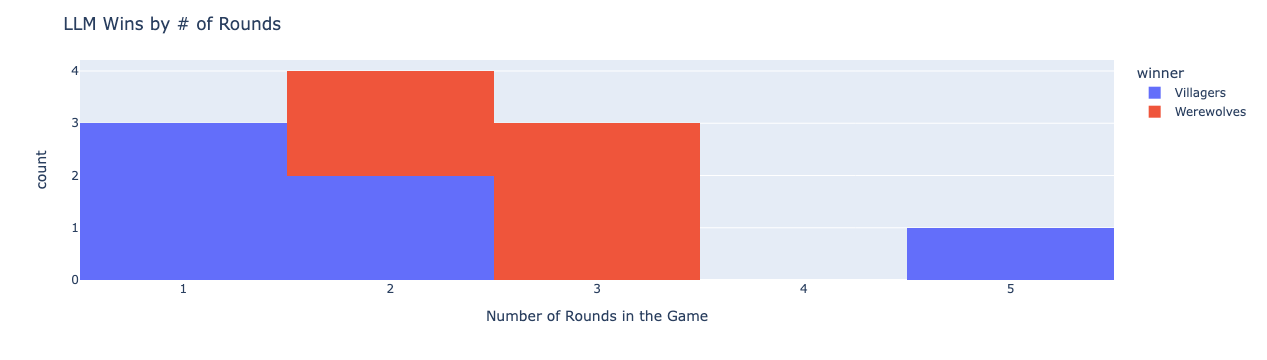

In [34]:
# Win over time by number of rounds

fig = px.histogram(llm_rounds_df.groupby("game_id")[["round", "winner"]].last(), x="round", color="winner")
fig.update_layout(title="LLM Wins by # of Rounds", xaxis_title="Number of Rounds in the Game")
fig.show()

### Strategies used

In [24]:
# Overall strategy used bar plot

In [ ]:
# Strategy used over time (LLMs)

In [ ]:
# Strategy used by player role bar plot

In [25]:
# PCA/Clustering of strategies?

### LLM voting over time

In [49]:
llm_rounds_exploded = llm_rounds_df.explode(["players", "roles"], ignore_index=True)
llm_rounds_exploded[

,players,eliminated,unmasked,protected,exiled,success,game_id,winner,round,roles
0,Harold,Dan,Will,Hayley,NaN,True,861,Werewolves,0,Villager
1,Will,Dan,Will,Hayley,NaN,True,861,Werewolves,0,Villager
2,Sam,Dan,Will,Hayley,NaN,True,861,Werewolves,0,Villager
3,Jackson,Dan,Will,Hayley,NaN,True,861,Werewolves,0,Villager
4,Hayley,Dan,Will,Hayley,NaN,True,861,Werewolves,0,Werewolf
...,...,...,...,...,...,...,...,...,...,...
177,Mason,Harold,Hayley,Harold,Hayley,True,635,Villagers,2,Villager
178,Dan,Harold,Hayley,Harold,Hayley,True,635,Villagers,2,Villager
179,Paul,Harold,Hayley,Harold,Hayley,True,635,Villagers,2,Villager
180,Derek,Harold,Hayley,Harold,Hayley,True,635,Villagers,2,Doctor


In [51]:
llm_rounds_df["roles"]

0     [Villager, Villager, Villager, Villager, Werew...
1     [Villager, Villager, Villager, Werewolf, Werew...
2                [Villager, Werewolf, Werewolf, Doctor]
3     [Villager, Villager, Villager, Werewolf, Werew...
4     [Villager, Villager, Villager, Werewolf, Werew...
5      [Villager, Villager, Werewolf, Werewolf, Doctor]
6              [Villager, Villager, Werewolf, Werewolf]
7     [Villager, Villager, Villager, Werewolf, Werew...
8     [Villager, Villager, Villager, Werewolf, Docto...
9                  [Villager, Villager, Villager, Seer]
10    [Villager, Villager, Villager, Werewolf, Docto...
11                   [Villager, Villager, Doctor, Seer]
12    [Villager, Villager, Villager, Villager, Werew...
13    [Villager, Villager, Villager, Werewolf, Werew...
14             [Villager, Villager, Werewolf, Werewolf]
15    [Villager, Villager, Villager, Werewolf, Docto...
16               [Villager, Villager, Villager, Doctor]
17    [Villager, Villager, Villager, Werewolf, D